In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.display import clear_output
pd.set_option('display.max_columns', None)

sns.set(style="whitegrid", rc={"lines.linewidth": 4})
plt.rcParams.update({'axes.labelsize': 13.5})

In [2]:
def correlation_matrix(df , title=""):

    corr = df.corr()

    mask = np.triu(np.ones_like(corr, dtype=np.bool))

    f, ax = plt.subplots(figsize=(16, 9))

    cmap = sns.diverging_palette(240, 10, sep=20 , as_cmap=True)

 
    sns_plot = sns.heatmap(corr , mask = mask , cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, 
            cbar_kws={"shrink": .5})
     
    plt.title(title, fontsize=14)
    plt.show()
    
    figure = sns_plot.get_figure()
    figure.savefig(f'../imagenes/correlacionDatos/{title}.png', dpi=200, bbox_inches='tight')


In [3]:
df = pd.read_csv("../data/datasets/cleanDataConfig.csv" , sep=";")
df.head()

,id_leg,operation,runway,hexid,callsign,type,origin,destination,altitude,ground_speed,vertical_rate,tmp,dew_pt,rel_hum,wind_dir,win_sp,wind_gust,visib,press,sky_lvl,rain,snow,drizzle,fog,time_class,day_week,month,time_ref,operation_Landing,operation_TakeOff,runway_14L,runway_14R,runway_18L,runway_18R,runway_32L,runway_32R,runway_36L,runway_36R,configuration_NORTE,configuration_SUR,configuration
0,733513,0,5,483,6920,22,186,268,1625.0,142.0,-768.0,7.0,0.0,61.017,250.0,20.372,0.000000,10.0,1030.0,10.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0,0
1,733498,0,5,515,246,23,664,268,1850.0,137.0,-768.0,7.0,-1.0,56.724,250.0,25.928,44.447962,10.0,1030.0,10.0,0.0,0.0,0.0,0.0,3.0,1.0,1.0,7.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0,0
2,733495,0,5,814,262,67,212,268,2200.0,156.0,-832.0,7.0,-1.0,56.724,230.0,16.668,0.000000,10.0,1031.0,10.0,0.0,0.0,0.0,0.0,3.0,1.0,1.0,8.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0,0
3,733501,0,5,625,277,23,254,268,1862.5,143.0,-640.0,7.0,-1.0,56.724,230.0,16.668,0.000000,10.0,1031.0,10.0,0.0,0.0,0.0,0.0,3.0,1.0,1.0,8.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0,0
4,733496,0,5,491,268,23,421,268,2000.0,136.0,-640.0,5.0,0.0,70.063,160.0,12.964,0.000000,10.0,1031.0,10.0,0.0,0.0,0.0,0.0,4.0,1.0,1.0,9.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0,0


In [4]:
df.shape

(733822, 41)

In [5]:
df_aux = df.drop(columns=['configuration', 'runway', 'operation', 'sky_lvl'], axis=1)

In [6]:
runway_list = ['runway_14L','runway_14R','runway_18L','runway_18R','runway_32L','runway_32R','runway_36L','runway_36R','operation_Landing','operation_TakeOff']
airplane_list = ['id_leg','hexid','callsign','type','origin','destination']
config_list = ['configuration_NORTE','configuration_SUR']

airplane_df = df_aux[(runway_list + airplane_list + config_list)]

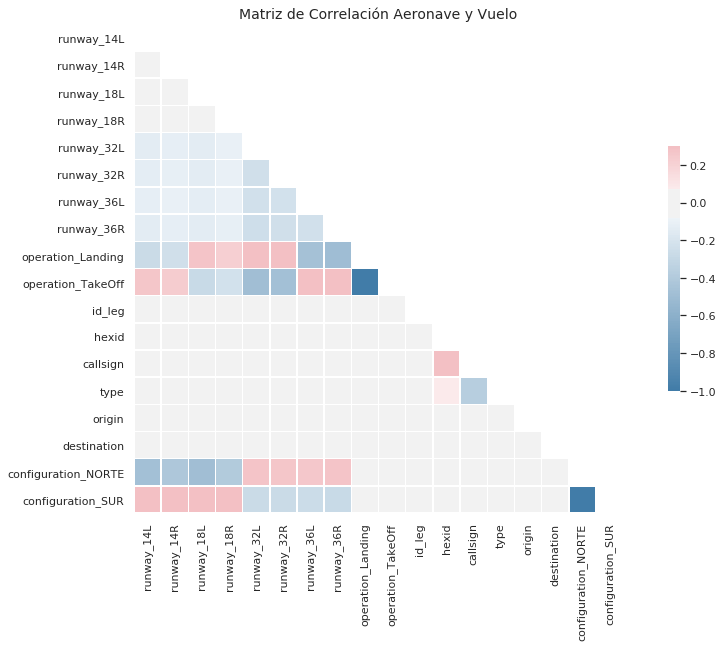

In [7]:
correlation_matrix(airplane_df , title="Matriz de Correlación Aeronave y Vuelo")  

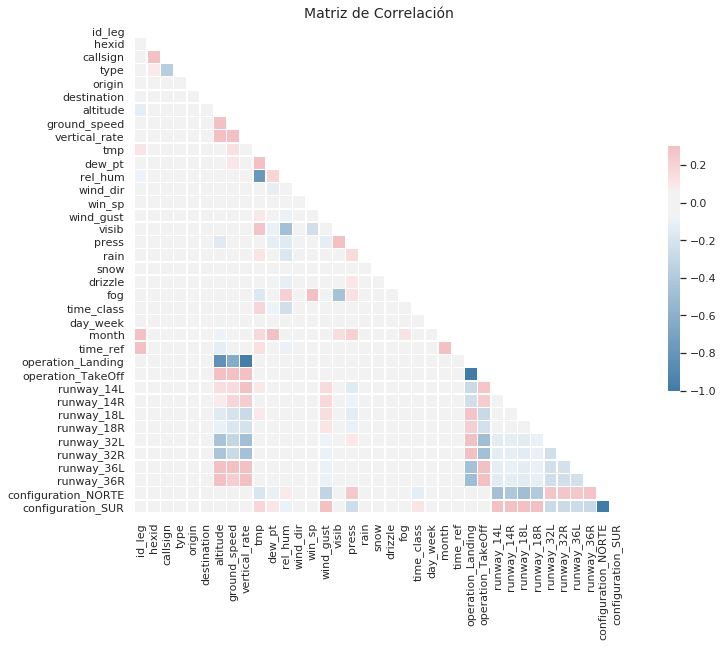

In [8]:
correlation_matrix(df_aux , title="Matriz de Correlación")

In [9]:
runway_list = ['runway_14L','runway_14R','runway_18L','runway_18R','runway_32L','runway_32R','runway_36L','runway_36R','operation_Landing','operation_TakeOff']
meteorology_list = ['tmp','dew_pt','rel_hum','wind_dir','win_sp','wind_gust','visib','press','snow','drizzle','fog']
config_list = ['configuration_NORTE','configuration_SUR']

aux = df_aux[df_aux['month'] == 7]

meteorology_df = aux[(runway_list + meteorology_list + config_list)]


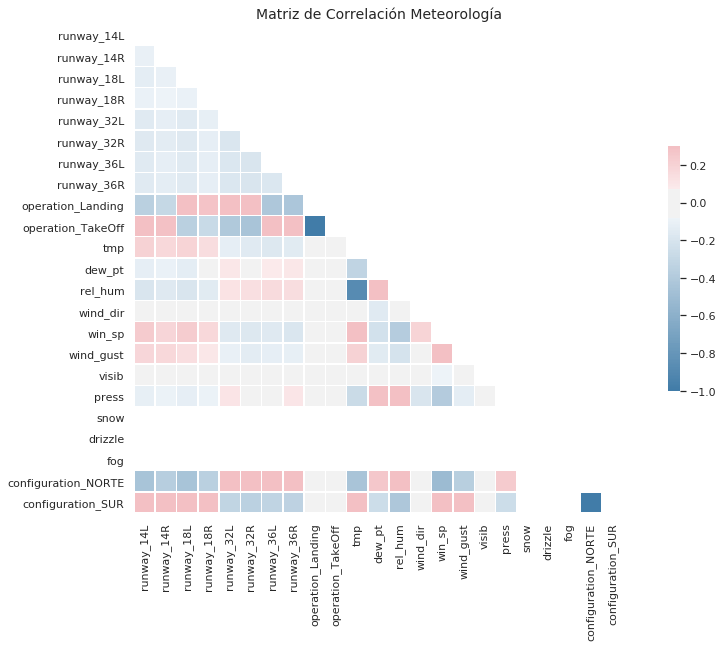

In [10]:
correlation_matrix(meteorology_df , title="Matriz de Correlación Meteorología")  

In [11]:
flight_data_list = ['time_class','day_week','month','altitude','ground_speed','vertical_rate']
config_list = ['configuration_NORTE','configuration_SUR']


df_fligh_data = df[(runway_list + flight_data_list + config_list)]

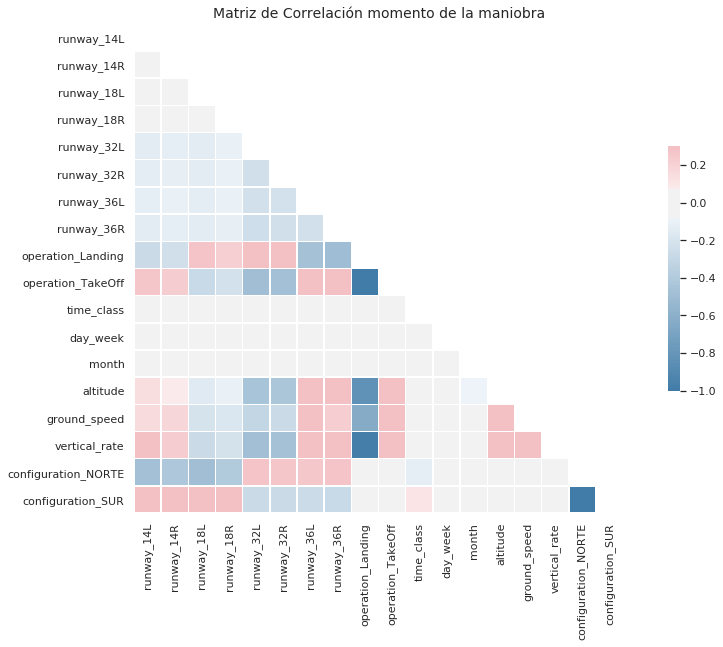

In [12]:
correlation_matrix(df_fligh_data , title="Matriz de Correlación momento de la maniobra")

In [13]:
def CorrelationMonthMatrix(df):
    for i in range (1,13):
        df_aux = df[df['month'] == float(i)]
        correlation_matrix(df_aux , title="Matriz de Correlación para el mes {}".format(i))
        clear_output(wait=True)

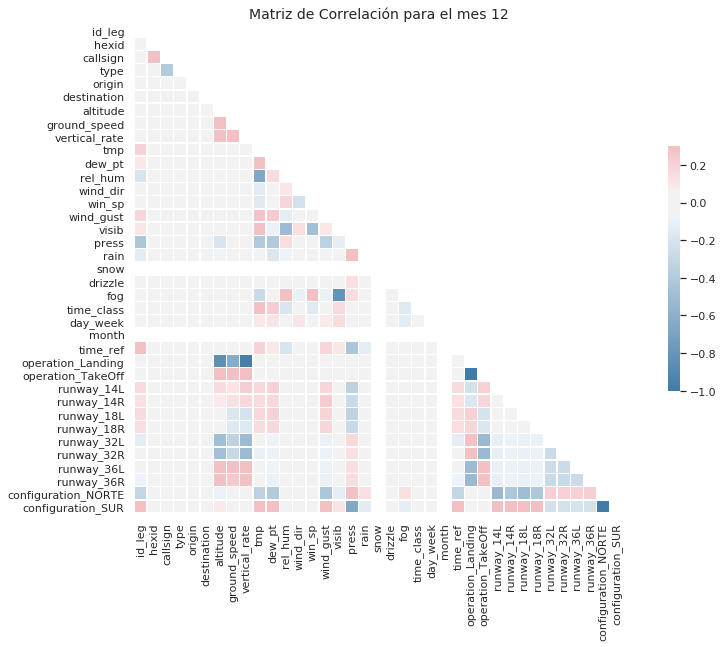

In [14]:
CorrelationMonthMatrix(df=df_aux)